In [1]:
# Import required packages and mnist dataset from keras.

import os
import numpy as np
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Reshape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Load the mnist dataset and store the training and testing images in x_train, y_train and x_text, y_test

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

11493376/11490434 [==============================] - 1s 0us/step
Train Set Size = 60000 images
Test Set Size = 10000 images


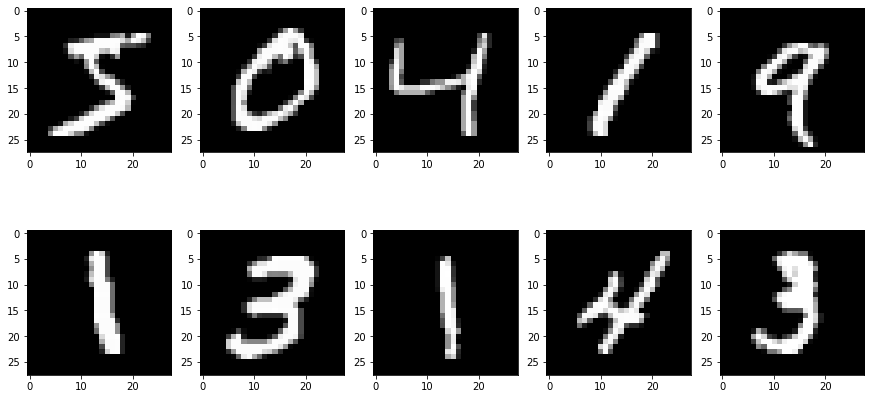

Labels : [5 0 4 1 9]
Labels : [1 3 1 4 3]


In [3]:
# Display few images from training sample

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))

In [0]:
# Data Preprocessing.

y_train_onehot = to_categorical(y_train, num_classes=None, dtype='float32')

In [0]:
# Build the VGG-16 model

optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def vgg16():
    model = Sequential()
    model.add(Reshape((28, 28, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=((28, 28, 1)), activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2), strides=(2,2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2), strides=(2,2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2), strides=(2,2)))
    
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2), strides=(2,2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    # model.add(MaxPooling2D(data_format="channels_last", pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

# Store the defined model in a variable
model = vgg16()

In [0]:
# Configure training parameters 

nb_epoch = 50
batch_size = 128

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='auto')

def run_vgg16():
    
    history = LossHistory()
    model.fit(x_train, y_train_onehot, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=1, shuffle=True, callbacks=[history, early_stopping])
    

    predictions = model.predict(x_test, verbose=0)
    return predictions, history

def test_accuracy():
    tp = []
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
            tp.append(i)
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err, tp

In [7]:
# Traing the built VGG-16 model
%%time
predictions, history = run_vgg16()

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 20s 453us/step - loss: 0.1132 - accuracy: 0.9623 - val_loss: 0.0922 - val_accuracy: 0.9808
Epoch 2/50
45000/45000 [==============================] - 13s 290us/step - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.0122 - val_accuracy: 0.9968
Epoch 3/50
45000/45000 [==============================] - 13s 292us/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0190 - val_accuracy: 0.9950
Epoch 4/50
45000/45000 [==============================] - 13s 292us/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0095 - val_accuracy: 0.9977
Epoch 5/50
45000/45000 [==============================] - 13s 293us/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0087 - val_accuracy: 0.9979
Epoch 6/50
45000/45000 [==============================] - 13s 294us/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0110 - val_accuracy: 0.9976
Epoch 7/50
45000/45000 [==============================] 

In [8]:
# Summary of built VGG-16 model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)        

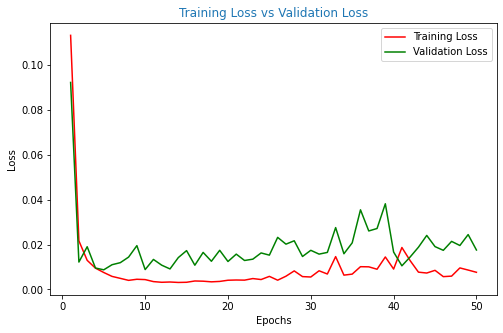

In [9]:
# Check the Training loss and Validation loss over epoch size
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Training Loss vs Validation Loss', color='C0')
ax.set(xlabel='Epochs', ylabel='Loss')
ax.plot(range(1,nb_epoch+1),history.losses,  label='Training Loss',color='red')
ax.plot(range(1,nb_epoch+1),history.val_losses, label='Validation Loss', color='green')
ax.legend()

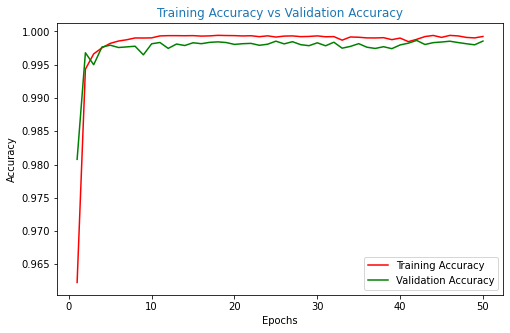

In [10]:
# Check the Training Accuracy and Validation Accuracy over epoch size
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Training Accuracy vs Validation Accuracy', color='C0')
ax.set(xlabel='Epochs', ylabel='Accuracy')
ax.plot(range(1,nb_epoch+1),history.acc,  label='Training Accuracy',color='red')
ax.plot(range(1,nb_epoch+1),history.val_acc, label='Validation Accuracy', color='green')
ax.legend()

In [11]:
# Evaluate the Test Accuracy

p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))


Test accuracy: 99.33 %


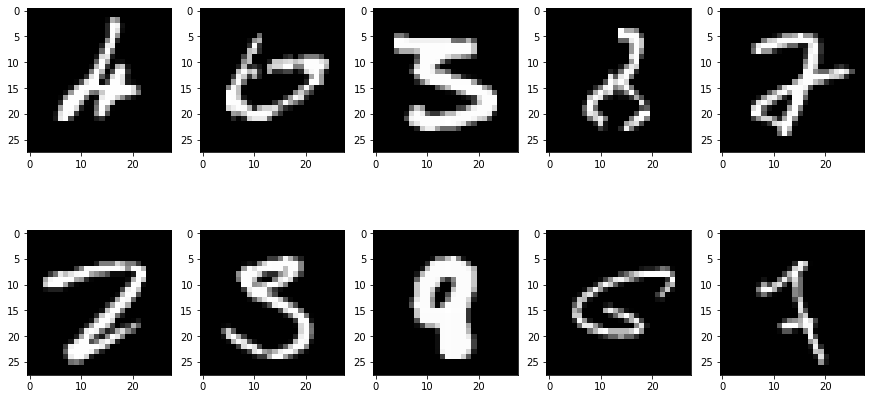

True:          [4 6 3 8 2]
classified as: [2 0 5 2 7]
True:          [2 3 8 6 7]
classified as: [7 5 9 5 1]


In [12]:
# Visualize few incorrectly classified test samples

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test[p[2][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test[p[2][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[2][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[2][0:5]], axis=1)))

print("True:          {}".format(y_test[p[2][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[2][6:11]], axis=1)))

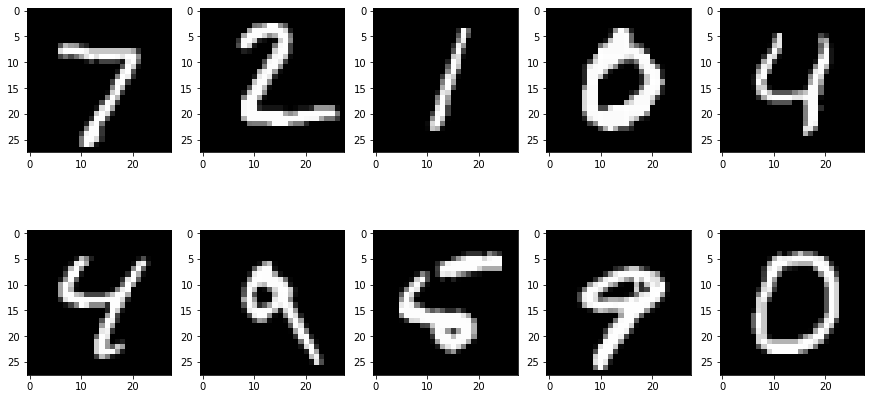

True:          [7 2 1 0 4]
classified as: [7 2 1 0 4]
True:          [4 9 5 9 0]
classified as: [4 9 5 9 0]


In [15]:
# Visualize few correctly classified test samples

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test[p[3][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test[p[3][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[3][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[3][0:5]], axis=1)))

print("True:          {}".format(y_test[p[3][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[3][6:11]], axis=1)))